In [ ]:
#!pip install pandas openpyxl

In [ ]:
import pandas as pd
import numpy as np
import os
import openpyxl
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#每个人的directory 都是一样的
directory_path = '/content/drive/MyDrive/Colab Notebooks'       # 需要将Colab Notebooks 移至 MyDrive
#这是dataframe
combined_data = pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/A2M.csv')
#这是包含csv 的data name list
filename_list_csv = ['A2M.csv']
#这是不包含csv 的data name list
filename_list = ['A2M']
#这是dictionary format, key是stock的名字，value 是它对应的data frame
file_dict = {'A2M':combined_data.copy()}
# Loop through each file in the directory
for filename in os.listdir(directory_path):
  if filename.endswith(".csv") and filename != 'A2M.csv':
    stock_name = filename.replace('.csv', '')
    file_data = pd.read_csv(directory_path +'/'+filename)
    filename_list_csv.append(filename)
    filename_list.append(stock_name)
    file_dict[stock_name] = file_data
    #这里用的是outer join,所以所有东西都有
    combined_data = pd.merge(combined_data, file_data, on='Date', how ='outer',suffixes=('', '_'+stock_name))
combined_data = combined_data.rename(columns={'Open': 'Open_A2M', 'High': 'High_A2M', 'Low': 'Low_A2M', 'Close': 'Close_A2M', 'Adj Close': 'Adj Close_A2M','Volume' : 'Volume_A2M'})
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data = combined_data.sort_values(by='Date').reset_index(drop= True)
combined_data = combined_data.loc[:, combined_data.columns[combined_data.columns.str.startswith('Adj') | (combined_data.columns == 'Date')]]
combined_data = combined_data.dropna()


In [ ]:
#不知道data长啥样的可以看看print,速度很快
# print(combined_data)
# print(filename_list_csv)
#print(filename_list)
#print(file_dict)


# ***Here is what we calculate return for each stock***

In [ ]:
stock_return  = pd.DataFrame(combined_data['Date'])
for filename in filename_list:
  stock_return[filename+'_return'] = combined_data['Adj Close_'+filename].pct_change()
stock_return = stock_return.dropna()
stock_return

<ipython-input-7-12c88b7e9149>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_return[filename+'_return'] = combined_data['Adj Close_'+filename].pct_change()


,Date,A2M_return,COL_return,OSH_return,CSL_return,GMG_return,FLT_return,BHP_return,MQG_return,DXS_return,...,QBE_return,SCG_return,WOR_return,VEA_return,REA_return,WTC_return,SYD_return,SOL_return,TWE_return,RHC_return
4817,2018-11-22,0.058824,0.000000,0.001362,0.033786,0.000000,0.010858,0.005696,0.012681,0.004845,...,-0.005222,0.015424,-0.004464,0.008196,0.013645,0.025292,0.006070,0.000000,0.056953,0.011968
4818,2018-11-23,-0.014141,0.007059,0.013606,-0.013473,0.008483,-0.004511,-0.007237,0.002890,0.007715,...,-0.006999,0.017722,-0.003737,0.027100,0.000792,0.011385,0.010558,0.001812,0.028691,0.012191
4819,2018-11-26,-0.018443,0.021028,-0.040268,-0.014370,0.010281,0.004100,-0.035499,-0.009343,0.024880,...,-0.009692,-0.004975,-0.033758,0.047493,-0.010286,0.023765,-0.004477,0.008680,-0.036054,-0.014561
4820,2018-11-27,0.017745,-0.016781,0.008392,-0.001113,-0.010176,0.040189,0.014459,0.013485,-0.006536,...,0.018683,0.015000,0.017857,-0.020151,-0.000666,0.039096,0.022489,-0.004303,0.014114,-0.009121
4821,2018-11-28,0.041026,-0.014740,0.002774,0.001560,-0.000935,-0.003512,-0.008422,0.000435,0.006579,...,0.005240,0.000000,-0.006102,-0.010283,0.019200,0.030570,-0.001466,0.002521,-0.008351,-0.003130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,2020-03-26,0.006289,-0.006006,0.135514,0.061999,0.061329,0.042061,-0.020128,0.007454,-0.009667,...,-0.029279,0.008772,0.087273,-0.027237,0.120000,0.103118,0.104882,0.024935,0.016227,0.153405
5156,2020-03-27,-0.008125,-0.049547,-0.032922,-0.075731,-0.106742,0.000000,-0.053472,-0.060364,-0.049892,...,-0.064965,-0.124638,-0.031773,-0.020000,-0.066511,0.050725,-0.008183,-0.083122,-0.055888,-0.105028
5157,2020-03-30,0.063642,0.069294,-0.008511,0.120235,0.071878,0.000000,0.040303,0.070491,0.027397,...,0.066998,-0.023179,0.029361,0.036735,0.125589,0.093103,-0.018152,-0.027087,0.039112,0.118504
5158,2020-03-31,-0.016588,-0.098692,0.021459,-0.051171,0.014250,0.000000,-0.040397,0.001168,0.010000,...,0.000000,0.061017,0.031879,0.000000,-0.051847,0.078864,-0.060504,-0.035796,0.020346,-0.018001


# ***Here is what we calculate mean return***

In [ ]:
mean_return = {}
for filename in filename_list:
  mean_return[filename] = stock_return[filename+'_return'].mean()
mean_return_df = pd.DataFrame.from_dict(mean_return, orient='index', columns=['Mean_Return'])
mean_return_df

,Mean_Return
A2M,0.002005
COL,0.000884
OSH,-0.002111
CSL,0.001835
GMG,0.000851
...,...
WTC,0.000894
SYD,0.000045
SOL,-0.001081
TWE,-0.000325


# ***Here is what we calculate covariance matrix***

In [ ]:
covariance_matrix = stock_return.cov()
covariance_matrix

<ipython-input-9-30a4d344eff7>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = stock_return.cov()


,A2M_return,COL_return,OSH_return,CSL_return,GMG_return,FLT_return,BHP_return,MQG_return,DXS_return,CTX_return,...,QBE_return,SCG_return,WOR_return,VEA_return,REA_return,WTC_return,SYD_return,SOL_return,TWE_return,RHC_return
A2M_return,0.000585,0.000109,0.000256,0.000178,0.000131,0.000126,0.000172,0.000195,0.000105,0.000099,...,0.000159,0.000047,0.000253,0.000192,0.000226,0.000134,0.000109,0.000153,0.000206,0.000149
COL_return,0.000109,0.000340,0.000168,0.000179,0.000142,0.000019,0.000144,0.000157,0.000126,0.000100,...,0.000160,0.000088,0.000144,0.000177,0.000210,0.000108,0.000062,0.000171,0.000121,0.000149
OSH_return,0.000256,0.000168,0.001286,0.000256,0.000493,0.000460,0.000341,0.000560,0.000333,0.000486,...,0.000499,0.000472,0.000974,0.000563,0.000528,0.000444,0.000308,0.000269,0.000324,0.000297
CSL_return,0.000178,0.000179,0.000256,0.000418,0.000171,0.000124,0.000193,0.000211,0.000113,0.000166,...,0.000215,0.000124,0.000296,0.000247,0.000283,0.000158,0.000143,0.000224,0.000195,0.000304
GMG_return,0.000131,0.000142,0.000493,0.000171,0.000561,0.000266,0.000121,0.000367,0.000341,0.000239,...,0.000301,0.000368,0.000399,0.000244,0.000341,0.000291,0.000205,0.000096,0.000176,0.000178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WTC_return,0.000134,0.000108,0.000444,0.000158,0.000291,0.000296,0.000126,0.000299,0.000156,0.000166,...,0.000220,0.000154,0.000453,0.000304,0.000286,0.001544,0.000142,0.000149,0.000206,0.000199
SYD_return,0.000109,0.000062,0.000308,0.000143,0.000205,0.000225,0.000140,0.000170,0.000154,0.000132,...,0.000177,0.000237,0.000244,0.000144,0.000222,0.000142,0.000400,0.000102,0.000124,0.000141
SOL_return,0.000153,0.000171,0.000269,0.000224,0.000096,0.000130,0.000217,0.000174,0.000096,0.000137,...,0.000184,0.000109,0.000275,0.000277,0.000204,0.000149,0.000102,0.000450,0.000159,0.000205
TWE_return,0.000206,0.000121,0.000324,0.000195,0.000176,0.000115,0.000187,0.000232,0.000128,0.000159,...,0.000232,0.000154,0.000370,0.000275,0.000245,0.000206,0.000124,0.000159,0.000726,0.000172


# ***Here is what we calaulate sp 500 matrix***

In [ ]:
#precleaning
import yfinance as yf
ticker_symbol = "^GSPC"

# Define the date range (start_date and end_date)
start_date = "2018-11-21"
end_date = "2020-04-02"

# Download historical data
sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
sp500 = sp500_data.rename(columns={'Open': 'Open_SP500', 'High': 'High_SP500', 'Low': 'Low_SP500', 'Close': 'Close_SP500', 'Adj Close': 'Adj Close_SP500','Volume' : 'Volume_SP500'})

In [ ]:
#calculate return
sp500['return_SP500'] = sp500['Adj Close_SP500'].pct_change()
sp500 = sp500.dropna()


In [ ]:
sp500_variance = sp500['return_SP500'].var()
sp500_variance

0.0003081086867853525

In [ ]:
sp500

,Open_SP500,High_SP500,Low_SP500,Close_SP500,Adj Close_SP500,Volume_SP500,return_SP500
Date,,,,,,,
2018-11-23,2633.360107,2647.550049,2631.090088,2632.560059,2632.560059,1651680000,-0.006555
2018-11-26,2649.969971,2674.350098,2649.969971,2673.449951,2673.449951,3523520000,0.015532
2018-11-27,2663.750000,2682.530029,2655.889893,2682.169922,2682.169922,3494380000,0.003262
2018-11-28,2691.449951,2744.000000,2684.379883,2743.790039,2743.790039,3984540000,0.022974
2018-11-29,2736.969971,2753.750000,2722.939941,2737.800049,2737.800049,3599200000,-0.002183
...,...,...,...,...,...,...,...
2020-03-26,2501.290039,2637.010010,2500.719971,2630.070068,2630.070068,7766990000,0.062414
2020-03-27,2555.870117,2615.909912,2520.020020,2541.469971,2541.469971,6201670000,-0.033687
2020-03-30,2558.979980,2631.800049,2545.280029,2626.649902,2626.649902,5751120000,0.033516


# ***K-Means Clustering***

In [ ]:
!pip install kneed

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [ ]:
# Prepare the data
returns_df = stock_return.drop('Date', axis=1)    # drop the date column
returns_df = returns_df.dropna()                  # K-Means algorithm doesn't accept NaN
returns_array = returns_df.T.values
print(returns_array)
# returns_df

[[ 0.05882353 -0.01414141 -0.01844262 ...  0.06364203 -0.01658762
   0.01325301]
 [ 0.          0.00705885  0.02102805 ...  0.06929434 -0.09869203
   0.04419525]
 [ 0.00136233  0.0136055  -0.04026849 ... -0.00851064  0.02145923
   0.12605042]
 ...
 [ 0.          0.00181155  0.00867996 ... -0.02708679 -0.03579551
   0.01355345]
 [ 0.05695257  0.02869136 -0.03605438 ...  0.03911205  0.02034588
   0.01395813]
 [ 0.01196827  0.01219076 -0.01456062 ...  0.11850431 -0.01800108
   0.08013268]]


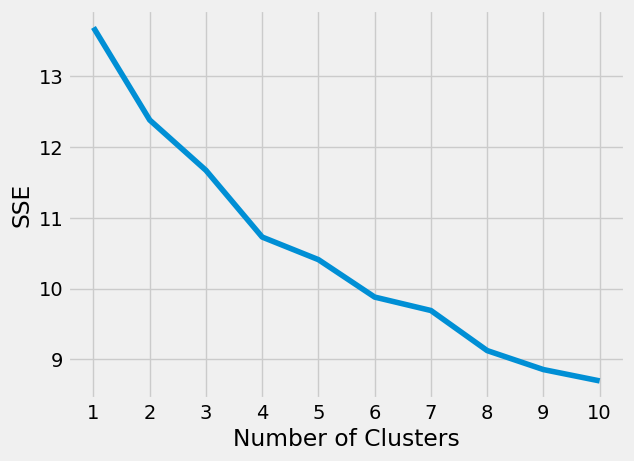

In [ ]:
# set the parameters
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
   }

# Elbow Method to decide the best K
sse = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(returns_array)
  sse.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal k
plt.style.use("fivethirtyeight")

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))

plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Utilizing 'kneed' to help us find the optimal k (elbow point)
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow
print(optimal_k)
print(sse[optimal_k-1]) # this is our optimal inner-group sse

4
10.729469732979133


In [ ]:
# Perform the optimal clustering
kmeans_optimal = KMeans(n_clusters=optimal_k, **kmeans_kwargs)
kmeans_optimal.fit(returns_array)

# The SSE of our clustering
sse_optimal = kmeans_optimal.inertia_
print(sse_optimal)

# get the clustering lables
labels = kmeans_optimal.labels_
print(labels)

# print the clustering result
# for i in range(len(labels)):
#   print(f"Stock {filename_list[i]} belongs to cluster{labels[i]}")

10.729469732979133
[2 2 0 2 0 0 2 0 0 0 2 0 0 0 2 2 0 0 0 2 2 3 0 2 2 2 2 2 2 2 2 1 0 2 0 2 2
 3 2 3 2 2 0 0 2 2 2 2 0 0 2 2 0 0 0 0 0 2 2 2 2 2 0 0 2 2 0 2 2 2 2 0 2 2
 2 2 0 0 0 2 2 2 3 2 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 2]


In [ ]:
# Store the clustering result in a dict (index version)
cluster_dict_index = {}     # make the values as index to be used for optimization

for i, j in zip(range(0,100), labels):
  if j not in cluster_dict_index:
    cluster_dict_index[j] = [i]
  else:
    cluster_dict_index[j].append(i)

print(cluster_dict_index)

{2: [0, 1, 3, 6, 10, 14, 15, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 33, 35, 36, 38, 40, 41, 44, 45, 46, 47, 50, 51, 57, 58, 59, 60, 61, 64, 65, 67, 68, 69, 70, 72, 73, 74, 75, 79, 80, 81, 83, 86, 88, 96, 97, 98, 99], 0: [2, 4, 5, 7, 8, 9, 11, 12, 13, 16, 17, 18, 22, 32, 34, 42, 43, 48, 49, 52, 53, 54, 55, 56, 62, 63, 66, 71, 76, 77, 78, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95], 3: [21, 37, 39, 82], 1: [31]}


In [ ]:
# Store the clustering result in a dict
cluster_dict = {}     # this is our final clustering result

for i, j in zip(filename_list, labels):
  if j not in cluster_dict:
    cluster_dict[j] = [i]
  else:
    cluster_dict[j].append(i)

print(cluster_dict)

{2: ['A2M', 'COL', 'CSL', 'BHP', 'CAR', 'ALX', 'MPL', 'IPL', 'ASX', 'AZJ', 'ALU', 'ORI', 'CWN', 'CWY', 'AMP', 'CPU', 'AMC', 'ILU', 'DMP', 'AGL', 'AST', 'BEN', 'IAG', 'CBA', 'HVN', 'BOQ', 'FMG', 'CCL', 'BXB', 'ALQ', 'ANN', 'COH', 'AWC', 'APA', 'FPH', 'JBH', 'TPM', 'SHL', 'RMD', 'SPK', 'XRO', 'SKI', 'SGR', 'WOW', 'WES', 'QUB', 'TCL', 'S32', 'TLS', 'RIO', 'SYD', 'SOL', 'TWE', 'RHC'], 0: ['OSH', 'GMG', 'FLT', 'MQG', 'DXS', 'CTX', 'ANZ', 'LLC', 'CHC', 'BSL', 'QAN', 'MGR', 'BLD', 'CGF', 'ALL', 'GPT', 'NAB', 'MFG', 'CIM', 'FBU', 'JHX', 'BPT', 'IEL', 'DOW', 'ORG', 'GOZ', 'SEK', 'WBC', 'TAH', 'VCX', 'SVW', 'SGP', 'STO', 'SUN', 'WPL', 'QBE', 'SCG', 'WOR', 'VEA', 'REA', 'WTC'], 3: ['NCM', 'EVN', 'NST', 'SAR'], 1: ['APT']}


In [ ]:
# To make it look better
cluster_df = pd.DataFrame.from_dict(cluster_dict, orient='index').T
cluster_df = cluster_df.sort_index(axis = 1)
cluster_df

,0,1,2,3
0,OSH,APT,A2M,NCM
1,GMG,None,COL,EVN
2,FLT,None,CSL,NST
3,MQG,None,BHP,SAR
4,DXS,None,CAR,None
5,CTX,None,ALX,None
6,ANZ,None,MPL,None
7,LLC,None,IPL,None
8,CHC,None,ASX,None
9,BSL,None,AZJ,None


In [ ]:
cov_2 = returns_df.cov()    # the Cov Matrix
cov_2_arr = cov_2.values    # as an np arraby

In [ ]:
# Pick one from each cluster to construct the optimal portfolio

# Find the indices of stocks with the minimum variance in each cluster
min_variance_stock_indices = []
min_variance_stock_symbols = []
for cluster_index, stock_indices in cluster_dict_index.items():
    # Extract the corresponding submatrix from the covariance matrix
    submatrix = cov_2_arr[np.ix_(stock_indices, stock_indices)]

    # Calculate the variance for each stock in the submatrix
    variances = np.diag(submatrix)

    # Find the index of the stock with the minimum variance
    min_variance_stock_index = stock_indices[np.argmin(variances)]

    # Add it to the result list
    min_variance_stock_indices.append(min_variance_stock_index)
    min_variance_stock_symbols.append(filename_list[min_variance_stock_index])

# Print the result
print(min_variance_stock_indices)
print(min_variance_stock_symbols)

[38, 63, 21, 31]
['AST', 'GOZ', 'NCM', 'APT']


# ***Data for finding out optimal portfolios***

We should use the data without NAs to construct our strategy, as these missing values could cause lots of problems.

***Please note that we have a change in our models***, we now first use the clustering results to choose one representative stock from each cluster, and here I chose the one with the minimum variance. And we only use these 4 stocks (as we have 4 clusters) in our optimization problem, instead of using all 100 stocks. This method is reasonable since that it is hard to construct a portfolio with 100 stocks in real life, and such a procedure has been seen in some papers.

***As a result, the 'balance constraint' is removed from our constraints.***

Some variables you might find helpful are as follows:

In [ ]:
returns_df    # the returns without missing value, which is first defined in the K-Means clustering part

,A2M_return,COL_return,OSH_return,CSL_return,GMG_return,FLT_return,BHP_return,MQG_return,DXS_return,CTX_return,...,QBE_return,SCG_return,WOR_return,VEA_return,REA_return,WTC_return,SYD_return,SOL_return,TWE_return,RHC_return
4817,0.058824,0.000000,0.001362,0.033786,0.000000,0.010858,0.005696,0.012681,0.004845,0.011729,...,-0.005222,0.015424,-0.004464,0.008196,0.013645,0.025292,0.006070,0.000000,0.056953,0.011968
4818,-0.014141,0.007059,0.013606,-0.013473,0.008483,-0.004511,-0.007237,0.002890,0.007715,0.003740,...,-0.006999,0.017722,-0.003737,0.027100,0.000792,0.011385,0.010558,0.001812,0.028691,0.012191
4819,-0.018443,0.021028,-0.040268,-0.014370,0.010281,0.004100,-0.035499,-0.009343,0.024880,0.012295,...,-0.009692,-0.004975,-0.033758,0.047493,-0.010286,0.023765,-0.004477,0.008680,-0.036054,-0.014561
4820,0.017745,-0.016781,0.008392,-0.001113,-0.010176,0.040189,0.014459,0.013485,-0.006536,0.016562,...,0.018683,0.015000,0.017857,-0.020151,-0.000666,0.039096,0.022489,-0.004303,0.014114,-0.009121
4821,0.041026,-0.014740,0.002774,0.001560,-0.000935,-0.003512,-0.008422,0.000435,0.006579,-0.009051,...,0.005240,0.000000,-0.006102,-0.010283,0.019200,0.030570,-0.001466,0.002521,-0.008351,-0.003130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,0.006289,-0.006006,0.135514,0.061999,0.061329,0.042061,-0.020128,0.007454,-0.009667,0.077143,...,-0.029279,0.008772,0.087273,-0.027237,0.120000,0.103118,0.104882,0.024935,0.016227,0.153405
5156,-0.008125,-0.049547,-0.032922,-0.075731,-0.106742,0.000000,-0.053472,-0.060364,-0.049892,-0.035367,...,-0.064965,-0.124638,-0.031773,-0.020000,-0.066511,0.050725,-0.008183,-0.083122,-0.055888,-0.105028
5157,0.063642,0.069294,-0.008511,0.120235,0.071878,0.000000,0.040303,0.070491,0.027397,0.021998,...,0.066998,-0.023179,0.029361,0.036735,0.125589,0.093103,-0.018152,-0.027087,0.039112,0.118504
5158,-0.016588,-0.098692,0.021459,-0.051171,0.014250,0.000000,-0.040397,0.001168,0.010000,0.000897,...,0.000000,0.061017,0.031879,0.000000,-0.051847,0.078864,-0.060504,-0.035796,0.020346,-0.018001


In [ ]:
mean_return_2 = {}    # this is the mean return of each stock calculating with data without missing value
for filename in filename_list:
    mean_return_2[filename] = returns_df[filename+'_return'].mean()
mean_return_df2 = pd.DataFrame.from_dict(mean_return_2, orient='index', columns=['Mean_Return'])
mean_return_df2 # this is the df

,Mean_Return
A2M,0.002005
COL,0.000884
OSH,-0.002111
CSL,0.001835
GMG,0.000851
...,...
WTC,0.000894
SYD,0.000045
SOL,-0.001081
TWE,-0.000325


### *The following data is what we would use in our optimization models.*

In [ ]:
rep_mean_returns_df = mean_return_df2.loc[['A2M', 'OSH', 'QBE', 'DXS']]   # this is the mean returns vector of the 4 representative stocks, the μ in our model.
rep_cov = returns_df[['A2M_return', 'OSH_return', 'QBE_return', 'DXS_return']].cov()
print(rep_mean_returns_df)
print(rep_cov)

     Mean_Return
A2M     0.002005
OSH    -0.002111
QBE    -0.000324
DXS     0.000156
            A2M_return  OSH_return  QBE_return  DXS_return
A2M_return    0.000585    0.000256    0.000159    0.000105
OSH_return    0.000256    0.001286    0.000499    0.000333
QBE_return    0.000159    0.000499    0.000484    0.000253
DXS_return    0.000105    0.000333    0.000253    0.000331


# ***Target Return & Min Variance***





I failed (now you succeeded)


😝

In [ ]:
import cvxpy as cp
import os
import matplotlib.pyplot as plt

In [ ]:
# Convert DataFrame to numpy array for optimization
ret = rep_mean_returns_df.values
cov = rep_cov.values

In [ ]:
# Calculate Min and Max Mean Returns

mi = ret.min()
ma = ret.max()

target_returns = np.linspace(mi, 0.005, 100)

print(target_returns)


[-2.11095238e-03 -2.03912458e-03 -1.96729677e-03 -1.89546897e-03
 -1.82364117e-03 -1.75181337e-03 -1.67998557e-03 -1.60815777e-03
 -1.53632996e-03 -1.46450216e-03 -1.39267436e-03 -1.32084656e-03
 -1.24901876e-03 -1.17719095e-03 -1.10536315e-03 -1.03353535e-03
 -9.61707549e-04 -8.89879747e-04 -8.18051946e-04 -7.46224144e-04
 -6.74396342e-04 -6.02568540e-04 -5.30740738e-04 -4.58912937e-04
 -3.87085135e-04 -3.15257333e-04 -2.43429531e-04 -1.71601729e-04
 -9.97739277e-05 -2.79461259e-05  4.38816759e-05  1.15709478e-04
  1.87537280e-04  2.59365081e-04  3.31192883e-04  4.03020685e-04
  4.74848487e-04  5.46676289e-04  6.18504090e-04  6.90331892e-04
  7.62159694e-04  8.33987496e-04  9.05815297e-04  9.77643099e-04
  1.04947090e-03  1.12129870e-03  1.19312650e-03  1.26495431e-03
  1.33678211e-03  1.40860991e-03  1.48043771e-03  1.55226551e-03
  1.62409332e-03  1.69592112e-03  1.76774892e-03  1.83957672e-03
  1.91140452e-03  1.98323232e-03  2.05506013e-03  2.12688793e-03
  2.19871573e-03  2.27054

In [ ]:
#Optimize for Each Target return
portfolio_variances = []

portfolio_weights = []
portfolio_returns = []
portfolio_volatilities = []

num_assets = ret.shape[0]


for target_return in target_returns:


  # Define the optimization variables and problem for each target mean
  w = cp.Variable(num_assets)
  objective = cp.Minimize(cp.quad_form(w, cov))   # now we use the new cov matrix (without missing value)
  constraints = [
      cp.sum(w) == 1,
      w @ ret == target_return]   # the ret here is also new


  problem = cp.Problem(objective, constraints)
  problem.solve()

  #I just cant call problem.solve() idk why
  if problem.status == 'optimal':
    portfolio_weights.append(w.value)
    portfolio_returns.append(target_return)
    portfolio_volatilities.append(cp.sqrt(cp.quad_form(w, cov)).value)


In [ ]:
portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

#Assume a target volatility/risk???
target_volatility = 0.10

min_variance_idx = np.argmin(np.abs(portfolio_volatilities - target_volatility))
selected_portfolio_weights = portfolio_weights[min_variance_idx]

In [ ]:
#selected_portfolio_weights
#portfolio_returns[min_variance_idx]
#Volatility: {portfolio_volatilities[min_variance_idx]}")

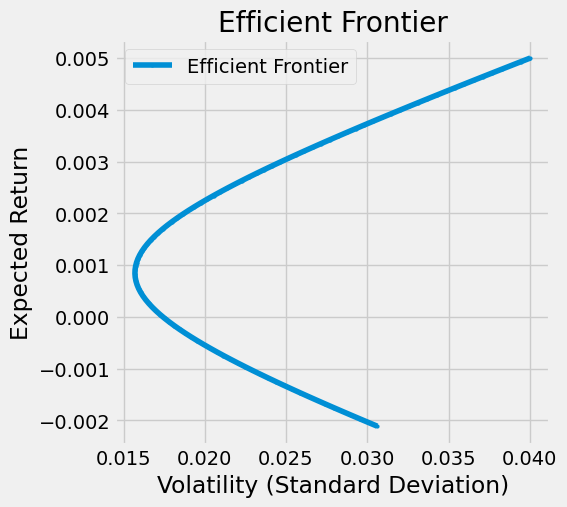

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(portfolio_volatilities, portfolio_returns, 'o-', markersize=2, label='Efficient Frontier')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

If we want a target return of 0.05% per day ( 18.25% APR), our optimal portfolio is:

In [ ]:
#Optimize for a Single Target return (0.0005 daily)
portfolio_variance = []

portfolio_weight = []
portfolio_return = []
portfolio_volatilitie = []

num_assets = ret.shape[0]

# Define the optimization variables and problem for each target mean
w2 = cp.Variable(num_assets)

objective2 = cp.Minimize(cp.quad_form(w2, cov))
constraints2 = [
    cp.sum(w2) == 1,
    w2 @ ret == 0.0005
    ]

# no shorting constraint
constraints2.append(w2 >= 0)

problem2 = cp.Problem(objective2, constraints2)
problem2.solve()

#I just cant call problem.solve() idk why
if problem2.status == 'optimal':
    target_return2 = w2.value @ ret
    portfolio_weight.append(w2.value)
    portfolio_return.append(target_return2)
    portfolio_volatilitie.append(cp.sqrt(cp.quad_form(w2, cov)).value)


In [ ]:
print(portfolio_weight)
print(portfolio_return)
print(portfolio_volatilitie)

[array([2.33579412e-01, 1.88196767e-18, 1.83625041e-01, 5.82795547e-01])]
[array([0.0005])]
[array(0.01603517)]


Max Return and Given risk level

Variables:

w = weights matrix (4*1)

μ = rep_mean_returns_df (1*4)

Σ = the Cov Matrix (4*4)

δ = 4 (the risk aversion index)

Objective: Max w'μ - 1/2 δw'Σw

s.t.:

w'·I = 1

w >= 0

      

In [ ]:
# Setting up variables for the optimization

# being consistent with the part before
w3 = cp.Variable(num_assets)

# mu: ret = rep_mean_returns_df.values
# Sigma: cov = rep_cov.values

# Setting the risk aversion index to 4
delta = 4

# Setting up the objective
objective3 = cp.Maximize(w3.T @ ret - 0.5 * delta * cp.quad_form(w3, cov))

# Setting up the constraints
constraints3 = [cp.sum(w3) == 1, w3 >= 0]

# Solve the model
problem3 = cp.Problem(objective3, constraints3)
problem3.solve()

# Calculate the weights and returns
optimal_weights = w3.value
optimal_returns = np.dot(optimal_weights, ret)

# Print out the results
print("Optimal Portfolio Return:", optimal_returns)
print("Optimal Weights:", optimal_weights)






Optimal Portfolio Return: [0.00195811]
Optimal Weights: [9.74500755e-01 1.30699200e-22 5.32801410e-23 2.54992451e-02]
